In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
phy_che_path = '附件2-指标总表.xls'
fragrant_path = '附件3-芳香物质.xls'

# below is all freaking data preprocessing
## i told you this takes the most effort
## Actually, below is not a very good way of doing it. You can try to improve it, the code needed is less than a half current code

In [19]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~理化指标~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
phy_che_total = pd.read_excel(phy_che_path, sheetname=1)
# 删除空列
phy_che_total.dropna(axis=1, how='all', inplace=True)
phy_che_total.fillna(0, inplace=True)
# 27*25 (27种红葡萄酒，25个理化指标)
ruby_phy_che = phy_che_total.values[1:28, 1:]
# 28*22 (28种白葡萄酒，22个理化指标)
sherry_phy_che = phy_che_total.values[31:, 4:]

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~芳香物质~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ruby_fragrant_total = pd.read_excel(fragrant_path, 0)
ruby_fragrant_total.drop([73, 74, 75], inplace=True)
ruby_fragrant_total.fillna(0, inplace=True)

sherry_fragrant_total = pd.read_excel(fragrant_path, 1)
sherry_fragrant_total.drop([73, 74, 75], inplace=True)
sherry_fragrant_total.fillna(0, inplace=True)


# 提取dataframe中所需芳香物质数据，保存为对应二维数组
def extract_fragrant_dataframe(dataframe, length_row, length_col):
    # 找到并提取列标签中的数字，获得对应葡萄酒编号
    pattern = re.compile(r'\d+')
    result = np.zeros((length_row, length_col))
    for name in dataframe.columns:
        match = pattern.findall(name)
        if match:
            result[int(match[0])-1] = dataframe[name].values
    return result


# 27*73 (27种红葡萄酒，73种芳香物质)
ruby_fragrant = extract_fragrant_dataframe(ruby_fragrant_total, 27, 73)
# 28*73 (28种白葡萄酒，73个理化指标)
sherry_fragrant = extract_fragrant_dataframe(sherry_fragrant_total, 28, 73)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~把理化指标和芳香物质组合起来~~~~~~~~~~~~~~~~~~~~~~~~~
# 27*98 (25+73=98)
ruby_total = np.hstack((ruby_phy_che, ruby_fragrant))
# 28*95 (22+73=95)
sherry_total = np.hstack((sherry_phy_che, sherry_fragrant))


## define PCA model for later use

In [20]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~使用PCA对数据降维，把每种酒的原始98或97维指标降为2维数据~~~~~~~~~~~~~~~~~~~~~~~~~
pca = PCA(n_components=2)

# do pca and clustering for ruby and sherry

In [21]:
# ~~~~~~~~~~~~~ruby~~~~~~~~~~~~~
ruby_pca = pca.____(____)
#result with pca
kmeans_ruby_pca = KMeans(n_clusters=3, random_state=0).fit(ruby_pca)
# 直接kmeans的结果
kmeans_ruby = KMeans(n_clusters=3, random_state=0).fit(____)
#you can compare it, do it yourself

In [22]:
# ~~~~~~~~~~~~~sherry~~~~~~~~~~~~~
sherry_pca = pca.____(____)
kmeans_sherry_pca = KMeans(n_clusters=3, random_state=0).fit(sherry_pca)
kmeans_sherry = KMeans(n_clusters=3, random_state=0).fit(____)

# plot the result

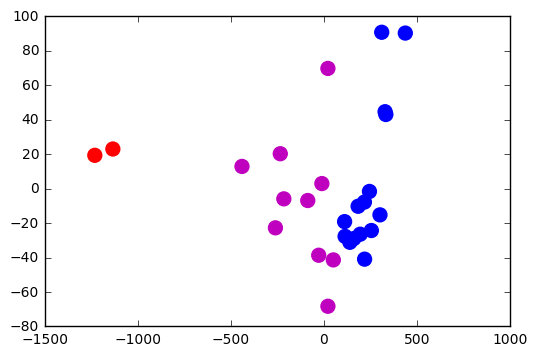

In [23]:
colors = np.array(['r', 'm', 'b']) 
plt.scatter(ruby_pca[:, 0], ruby_pca[:, 1], color=colors[kmeans_ruby_pca.labels_], s=100)

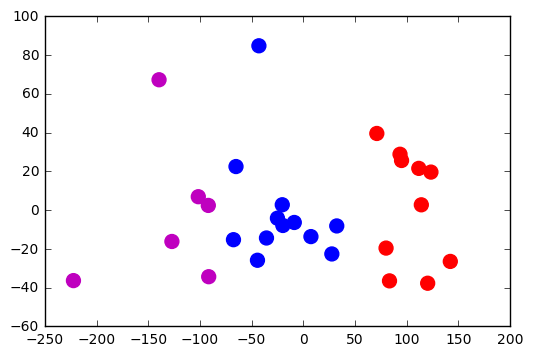

In [24]:
plt.scatter(sherry_pca[:, 0], sherry_pca[:, 1], color=colors[kmeans_sherry_pca.labels_], s=100)